In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2)

In [24]:
standardized_iris = pd.read_pickle(filepath_or_buffer='./pkls/dataset/standardized_iris')
print("Dataset shape:", standardized_iris.shape)

Dataset shape: (150, 4)


In [25]:
covariance_matrix = np.cov(standardized_iris.T)

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [27]:
pca_projected_2d = standardized_iris @ eigenvectors[:,0:2]
print(type(pca_projected_2d))
print(pca_projected_2d)

<class 'pandas.core.frame.DataFrame'>
            0         1
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]


In [28]:
pd.to_pickle(pca_projected_2d, filepath_or_buffer='./pkls/projected_points/pca_eigen_decomposition_projected_points')

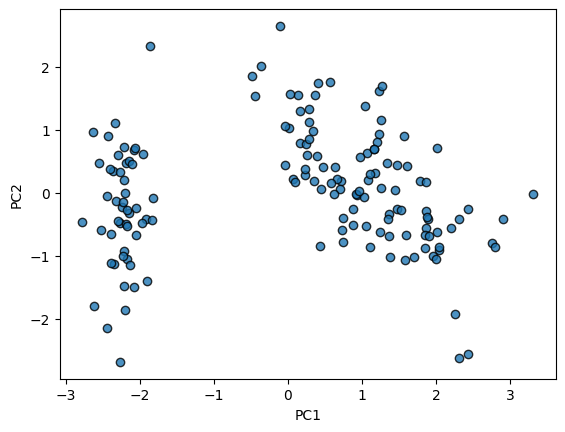

In [29]:
plt.clf()  # Clear the current figure
plt.scatter(x=pca_projected_2d.iloc[:,0],
            y=pca_projected_2d.iloc[:,1],
            edgecolors='k',
            alpha=0.8
            )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()